## Goal of this Notebook  
- Perform EDA on the given Dataset and provide concise summary of your exploration  
- Visualize distributions and provide concise summary

## Step 1: Loan Libraries and Data
Setup to accomplish the task

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import kagglehub as kh

/Users/vijaypatha/Developer/ML_LLM/Regression/BankChurners/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kh.dataset_download("sakshigoyal7/credit-card-customers")
df = pd.read_csv(path + "/BankChurners.csv") 
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


## Step 2: Exploratory Data Analysis (EDA) 
Prepare a refined dataset for further analysis, such as applying machine learning models or large language models

In [3]:
print(f"Rows and Columns of DataFrame: {df.shape}\n")
print(f"Additional Information of DataFrame: \n")
df.info()

Rows and Columns of DataFrame: (10127, 23)

Additional Information of DataFrame: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3 

In [4]:
df.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2","CLIENTNUM"], inplace=True)

In [5]:
df.select_dtypes(include='number').agg(['min','max','mean','std'])

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691


In [6]:
# What are the unique values in catgroical columms
df.select_dtypes(include='object').agg(['unique'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
unique,"[Existing Customer, Attrited Customer]","[M, F]","[High School, Graduate, Uneducated, Unknown, C...","[Married, Single, Unknown, Divorced]","[$60K - $80K, Less than $40K, $80K - $120K, $4...","[Blue, Gold, Silver, Platinum]"


In [7]:
#how many "unknows" are there
df[(df["Marital_Status"]=="Unknown") | (df["Education_Level"]=="Unknown") | (df["Income_Category"]=="Unknown")].shape

(3046, 20)

In [8]:
# drop rows with unknown values
# drop_unknowns = df[(df["Marital_Status"]=="Unknown") | (df["Education_Level"]=="Unknown") | (df["Income_Category"]=="Unknown")].index
# df.drop(drop_unknowns, inplace=True)

In [9]:
# print(df["Marital_Status"].unique())
# print(df["Education_Level"].unique())
# print(df["Income_Category"].unique())

In [10]:
# Quantifying the skewness of the numerical columns 
df.select_dtypes(include='number').skew()

Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64

### EDA Observations
- 23 Features, 10127 Observations (rows)
- Attrition_Flag is the target variable: [Existing Customer, Attrited Customer]
- No Nulls but there 3046 observations with unknown education_level, marital_status, and Income_category.
- Dropped 3 columns 
- 0.5 to 1 Moderately skewed: Months_Inactive_12_mon, Avg_Utilization_Ratio
- 1 and above are highliy skewed: Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1

## Step 3. Visualizations
Visualizing distributions, outliers, and patterns in raw data, prior to transformations

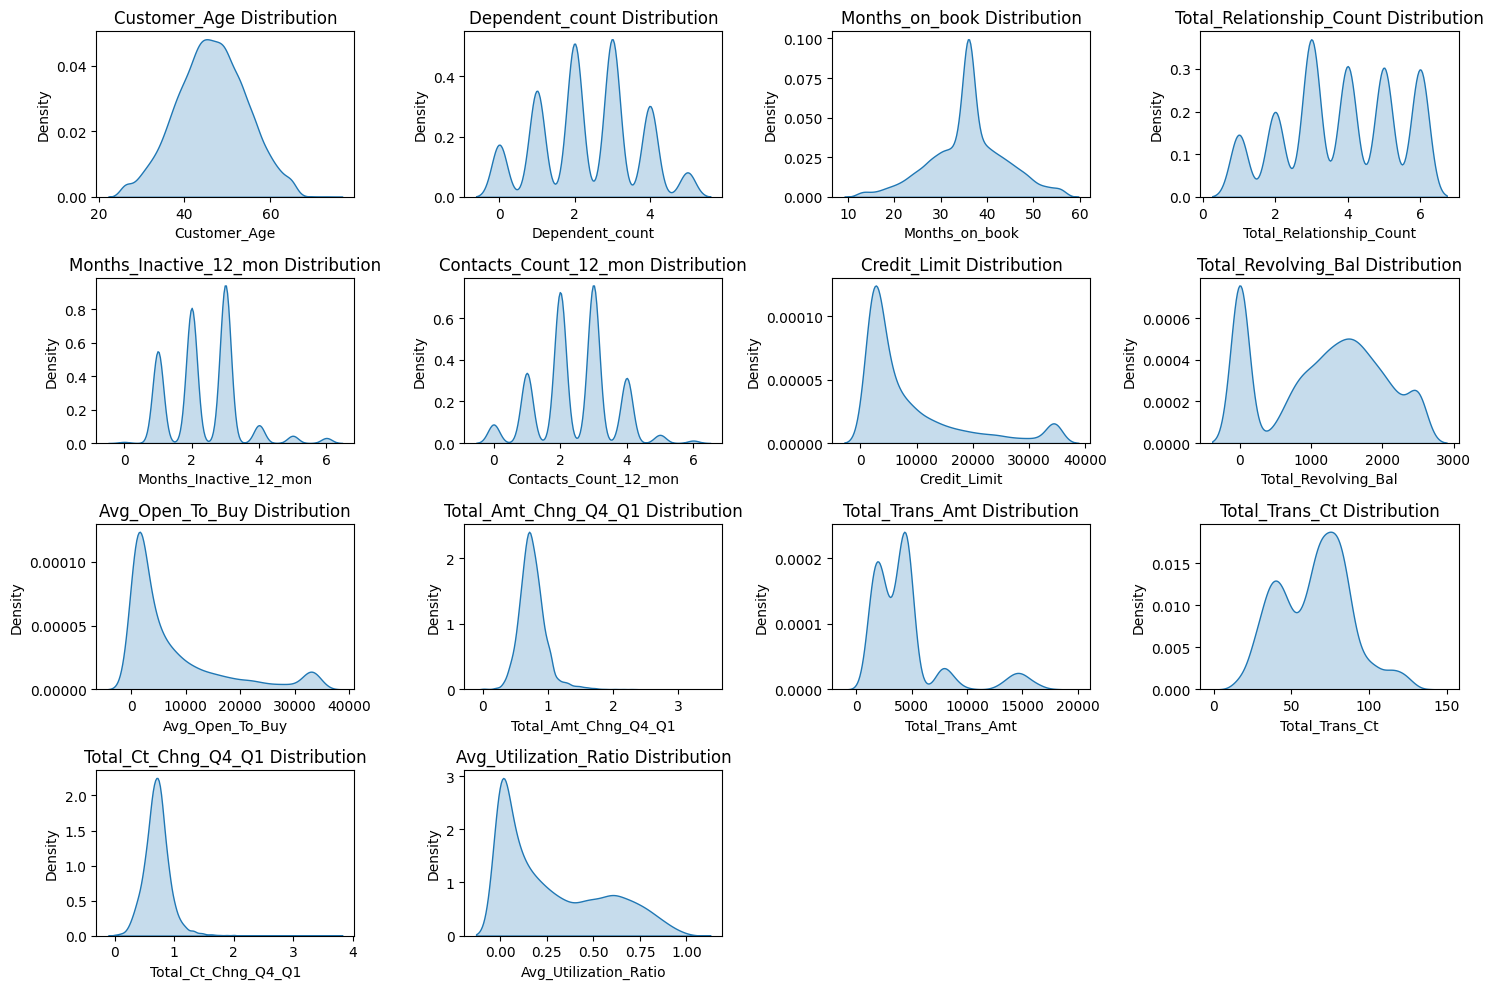

In [11]:
plt.figure(figsize=(15,10)) # container for the plot 

numerical_columns = df.select_dtypes(include='number').columns

for idx, col in enumerate(numerical_columns, start=1) : # get both the index (`idx`) and column name (`col`) while iterating. The index is passed to `plt.subplot()` as the position.
    # The `start=1` parameter in the `enumerate()` function is used to make the index (`idx`) start from 1 instead of the default value of 0 because plt.subplot has only index of 1
    plt.subplot(4,4,idx)
    sns.kdeplot(df[col], fill=True)
    plt.title(f"{col} Distribution")

plt.tight_layout()


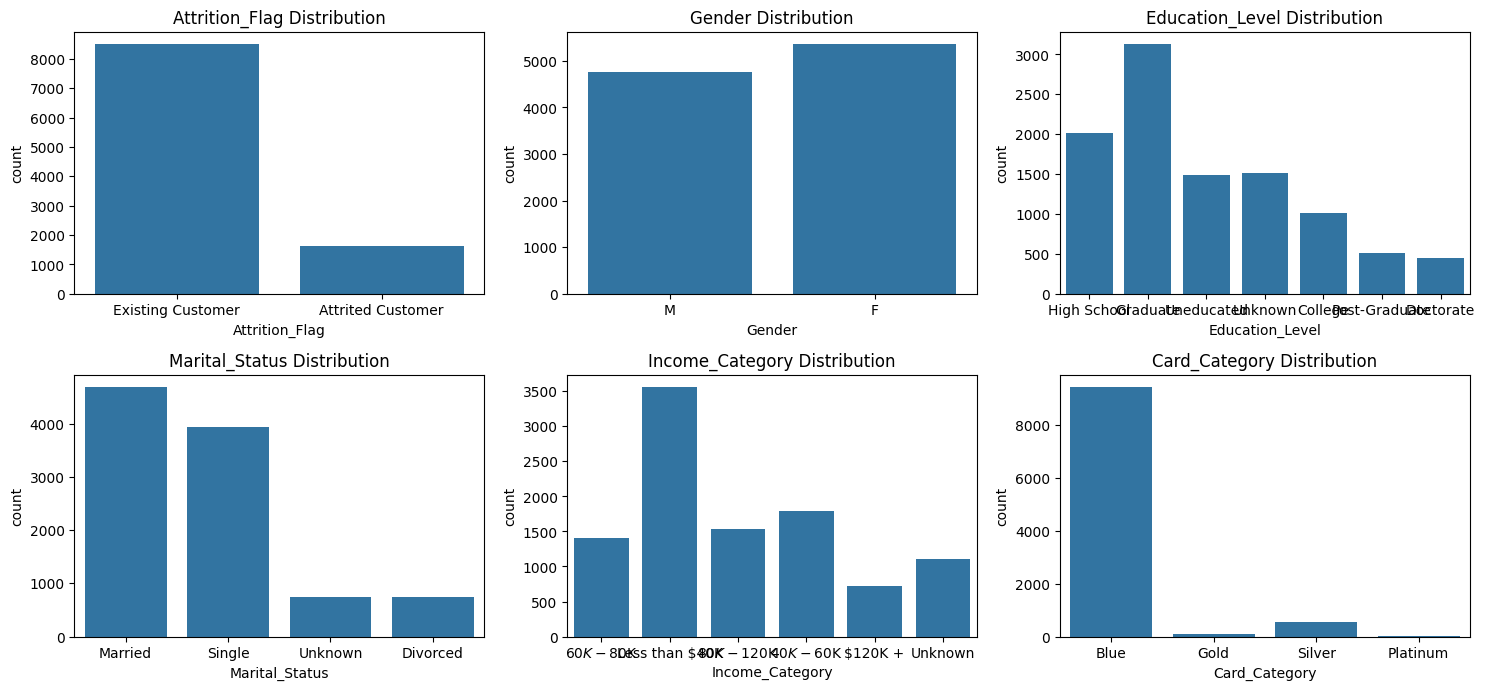

In [12]:
plt.figure(figsize=(15,10))
categorical_columns = df.select_dtypes(include='object').columns

for idx, col in enumerate(categorical_columns, start=1):
    plt.subplot(3,3,idx)
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Distribution")

plt.tight_layout()


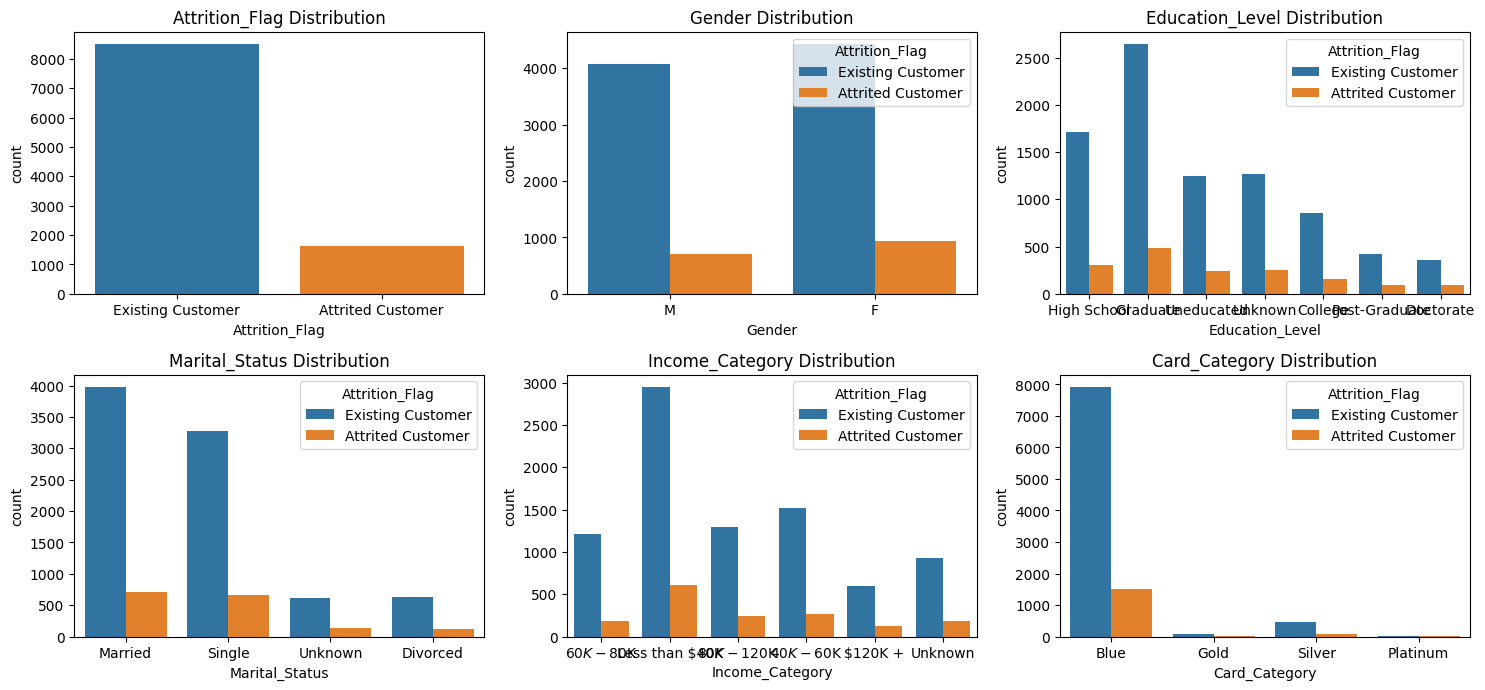

In [13]:
plt.figure(figsize=(15,10))

for idx, col in enumerate(categorical_columns, start=1):
    plt.subplot(3,3,idx)
    sns.countplot(data=df, x=col, hue='Attrition_Flag')
    plt.title(f"{col} Distribution")
plt.tight_layout()

### Visualization Observations 
- Highly skewed data, Bi-modal, Milti Modal data 
- A lot of unknows Marital Stauts, Income Category, and Education level. ~30% of rows has atleast one unknown. 

## Step 4: Data Cleaning

In [14]:
df["Education_Level"].replace("Unknown", df["Education_Level"].mode()[0], inplace=True)
df["Marital_Status"].replace("Unknown", df["Marital_Status"].mode()[0], inplace=True)
df["Income_Category"].replace("Unknown", df["Income_Category"].mode()[0], inplace=True)

/var/folders/tn/bllk4s_n0k9g75m59d6nyp8w0000gn/T/ipykernel_72041/2881716271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Education_Level"].replace("Unknown", df["Education_Level"].mode()[0], inplace=True)
/var/folders/tn/bllk4s_n0k9g75m59d6nyp8w0000gn/T/ipykernel_72041/2881716271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

## Step 5: Feature engineering
- Creating interaction terms between variables.
- Normalizing or scaling data.
- Encoding categorical variables (e.g., one-hot encoding).

In [15]:
# Customer Behavior Features
df['Account_Tenure_Years'] = df['Months_on_book'] / 12
df['Activity_Ratio'] = df['Total_Trans_Ct'] / df['Months_on_book']
df['Inactivity_Ratio'] = df['Months_Inactive_12_mon'] / df['Months_on_book']
df['Contact_Frequency'] = df['Contacts_Count_12_mon'] / df['Months_on_book']

# Credit Utilization Features
df['Credit_Utilization_Percentage'] = df['Total_Revolving_Bal'] / df['Credit_Limit']
df['Unused_Credit_Percentage'] = df['Avg_Open_To_Buy'] / df['Credit_Limit']
df['Revolving_Balance_Ratio'] = df['Total_Revolving_Bal'] / (df['Avg_Open_To_Buy'] + 1e-9)  # Avoid division by zero

# Transaction Features
df['Avg_Transaction_Amt'] = df['Total_Trans_Amt'] / (df['Total_Trans_Ct'] + 1e-9)  # Avoid division by zero
df['Transaction_Change_Ratio'] = df['Total_Ct_Chng_Q4_Q1'] / (df['Total_Trans_Ct'] + 1e-9)  # Avoid division by zero
df['Spending_Change_Ratio'] = df['Total_Amt_Chng_Q4_Q1'] / (df['Total_Trans_Amt'] + 1e-9)  # Avoid division by zero

# Customer Demographics Features
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels)

df['Dependent_Ratio'] = df['Dependent_count'] / (df['Customer_Age'] + 1e-9)  # Avoid division by zero

# Risk or Loyalty Features
df['Loyalty_Score'] = (df['Months_on_book'] * df['Total_Trans_Ct']) / (df['Months_Inactive_12_mon'] + 1)
df['Risk_Score'] = df['Credit_Utilization_Percentage'] * df['Months_Inactive_12_mon']
df['Transaction_to_Tenure_Ratio'] = df['Total_Trans_Ct'] / (df['Months_on_book'])
df['Spending_to_Limit_Ratio'] = df['Total_Trans_Amt'] / (df['Credit_Limit'])